In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [ ]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA22_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [3]:
#Diff between 17, 18 and 19 is that 18,19 have an extra column called 'Release Clause'
#20, 21 and 22 have an extra column called 'Defensive Awareness'

## DATA STRUCTURE/SHAPE/INFO

In [4]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [5]:
pandas_df.shape

(16710, 65)

In [6]:
pandas_df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
DefensiveAwareness     float64
Length: 65, dtype: object

In [ ]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA22_official_data.csv')

In [8]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str
212198,"""Bruno Fernandes""",26,"""https://cdn.sofifa.com/players…","""Portugal""","""https://cdn.sofifa.com/flags/p…",88,89,"""Manchester United""","""https://cdn.sofifa.com/teams/1…","""€107.5M""","""€250K""",2341,"""Right""",3.0,3.0,4.0,"""High/ High""","""Unique""","""Yes""","""<span class=""pos pos18"">CAM""",18.0,"""Jan 30, 2020""","""nan""","""2025""","""179cm""","""69kg""",87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,"""87.0""","""nan""",73.0,65.0,12.0,14.0,15.0,8.0,14.0,"""CAM""",88.0,"""€206.9M""","""72.0"""
209658,"""L. Goretzka""",26,"""https://cdn.sofifa.com/players…","""Germany""","""https://cdn.sofifa.com/flags/d…",87,88,"""FC Bayern München""","""https://cdn.sofifa.com/teams/2…","""€93M""","""€140K""",2314,"""Right""",4.0,4.0,3.0,"""High/ Medium""","""Unique""","""Yes""","""<span class=""pos pos11"">LDM""",8.0,"""Jul 1, 2018""","""nan""","""2026""","""189cm""","""82kg""",75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,"""82.0""","""nan""",85.0,77.0,13.0,8.0,15.0,11.0,9.0,"""CM""",87.0,"""€160.4M""","""74.0"""
176580,"""L. Suárez""",34,"""https://cdn.sofifa.com/players…","""Uruguay""","""https://cdn.sofifa.com/flags/u…",88,88,"""Atlético de Madrid""","""https://cdn.sofifa.com/teams/2…","""€44.5M""","""€135K""",2307,"""Right""",5.0,4.0,3.0,"""High/ Medium""","""Unique""","""Yes""","""<span class=""pos pos24"">RS""",9.0,"""Sep 25, 2020""","""nan""","""2022""","""182cm""","""83kg""",80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,"""87.0""","""nan""",45.0,38.0,27.0,25.0,31.0,33.0,37.0,"""ST""",88.0,"""€91.2M""","""42.0"""
192985,"""K. De Bruyne""",30,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",91,91,"""Manchester City""","""https://cdn.sofifa.com/teams/1…","""€125.5M""","""€350K""",2304,"""Right""",4.0,5.0,4.0,"""High/ High""","""Unique""","""Yes""","""<span class=""pos pos13"">RCM""",17.0,"""Aug 30, 2015""","""nan""","""2025""","""181cm""","""70kg""",94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,"""89.0""","""nan""",65.0,53.0,15.0,13.0,5.0,10.0,13.0,"""CM""",91.0,"""€232.2M""","""68.0"""
224334,"""M. Acuña""",29,"""https://cdn.sofifa.com/players…","""Argentina""","""https://cdn.sofifa.com/flags/a…",84,84,"""Sevilla FC""","""https://cdn.sofifa.com/teams/4…","""€37M""","""€45K""",2292,"""Left""",2.0,3.0,4.0,"""High/ High""","""Stocky (170-185)""","""No""","""<span class=""pos pos7"">LB""",19.0,"""Sep 14, 2020""","""nan""","""2024""","""172cm""","""69kg""",87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,"""87.0""","""nan""",84.0,82.0,8.0,14.0,13.0,13.0,14.0,"""LB""",84.0,"""€77.7M""","""80.0"""
212622,"""J. Kimmich""",26,"""https://cdn.sofifa.com/players…","""Germany""

In [9]:
polars_df.shape

(16710, 65)

In [10]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Float64,
 String,
 String]

In [11]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 16710  │ │ float64     │ 40    │                                                          │
│ │ Number of columns │ 65     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID            │     0 │             0 │ 220600 │  38500 │  27 │ 203900 │ 229300 │ 245400 │ 264700 │    ▁▅▇ │  │
│ │ Age           │     0 │             0 │  25.73 │  5.049 │  16 │     22 │     25 │     29 │     54 │  ▆▇▅▁  │  │
│ │ Overall       │     0 │             0 │  67.65 │  6.458 │  28 │     63 │     68 │     72 │     93 │   ▂▇▃  │  │
│ │ Potential     │     0 │             0 │  72.57 │  5.688 │  38 │     69 │     72 │     76 │     95 │   ▂▇▃  │  │
│ │ Special       │     0 │             0 │   1652 │  257.3 │ 571 │   1525 │   1687 │   1826 │   2341 │  ▁▂▇▆▁ │  │
│ │ International │     0 │             0 │   1.17 │ 0.4853 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation    │       │               │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot     │     0 │             0 │  3.008 │ 0.6817 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves   │     0 │             0 │  2.475 │ 0.7914 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▇▂  │  │
│ │ Jersey Number │    26 │ 0.15559545182 │  20.46 │   17.7 │   1 │      8 │     17 │     27 │     99 │  ▇▆▁   │  │
│ │               │       │        525433 │        │        │     │        │        │        │        │        │  │
│ │ Crossing      │     0 │             0 │  52.21 │  17.77 │   7 │     42 │     57 │     65 │     94 │ ▂▂▅▇▆  │  │
│ │ Finishing     │     0 │             0 │  48.73 │   19.4 │   3 │     34 │     53 │     64 │     95 │ ▂▃▅▇▅  │  │
│ │ HeadingAccura │     0 │             0 │  54.12 │  17.01 │   5 │     46 │     57 │     66 │     93 │ ▂▁▃▇▆▁ │  │
│ │ cy            │       │               │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing  │     0 │             0 │  61.31 │  13.67 │   8 │     57 │     64 │     70 │     94 │  ▁▁▇▇▁ │  │
│ │ Volleys       │    37 │ 0.22142429682 │  45.65 │  17.83 │   4 │     33 │     48 │     59 │     90 │ ▂▃▆▇▅▁ │  │
│ │               │       │        824655 │        │        │     │        │        │        │        │        │  │
│ │ Dribbling     │     0 │             0 │  58.59 │  17.93 │   5 │     54 │   63.5 │     70 │     96 │ ▂▁▂▇▇▁ │  │
│ │ Curve         │    37 │ 0.22142429682 │  50.57 │  18.24 │   6 │     39 │     53 │     64 │     94 │ ▂▃▅▇▅▁ │  │
│ │               │       │        824655 │        │        │     │        │        │        │        │        │  │
│ │ FKAccuracy    │     0 │             0 │  45.07 │   1

In [12]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 16710  │ │ float64     │ 37    │                                                          │
│ │ Number of columns │ 65     │ │ string      │ 23    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 220600 │  38500 │  27 │ 203900 │ 229300 │ 245400 │ 264700 │    ▁▅▇ │  │
│ │ Age            │  0 │               0 │  25.73 │  5.049 │  16 │     22 │     25 │     29 │     54 │  ▆▇▅▁  │  │
│ │ Overall        │  0 │               0 │  67.65 │  6.458 │  28 │     63 │     68 │     72 │     93 │   ▂▇▃  │  │
│ │ Potential      │  0 │               0 │  72.57 │  5.688 │  38 │     69 │     72 │     76 │     95 │   ▂▇▃  │  │
│ │ Special        │  0 │               0 │   1652 │  257.3 │ 571 │   1525 │   1687 │   1826 │   2341 │  ▁▂▇▆▁ │  │
│ │ International  │  0 │               0 │   1.17 │ 0.4853 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  3.008 │ 0.6817 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │  2.475 │ 0.7914 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▇▂  │  │
│ │ Jersey Number  │ 26 │ 0.1555954518252 │  20.46 │   17.7 │   1 │      8 │     17 │     27 │     99 │  ▇▆▁   │  │
│ │                │    │            5433 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  52.21 │  17.77 │   7 │     42 │     57 │     65 │     94 │ ▂▂▅▇▆  │  │
│ │ Finishing      │  0 │               0 │  48.73 │   19.4 │   3 │     34 │     53 │     64 │     95 │ ▂▃▅▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │  54.12 │  17.01 │   5 │     46 │     57 │     66 │     93 │ ▂▁▃▇▆▁ │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │  61.31 │  13.67 │   8 │     57 │     64 │     70 │     94 │  ▁▁▇▇▁ │  │
│ │ Volleys        │ 37 │ 0.2214242968282 │  45.65 │  17.83 │   4 │     33 │     48 │     59 │     90 │ ▂▃▆▇▅▁ │  │
│ │                │    │            4655 │        │        │     │        │        │        │        │        │  │
│ │ Dribbling      │  0 │               0 │  58.59 │  17.93 │   5 │     54 │   63.5 │     70 │     96 │ ▂▁▂▇▇▁ │  │
│ │ Curve          │ 37 │ 0.2214242968282 │  50.57 │  18.24 │   6 │     39 │     53 │     64 │     94 │ ▂▃▅▇▅▁ │  │
│ │                │    │            4655 │        │        │     │        │        │        │        │        │  │
│ │ FKAccuracy     │  0 │               0 │  45.07 │   1

In [13]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 220560.5 (38496.6)min < med < max:27.0 < 229253.0 < 264704.0IQR (CV) : 41477.5 (5.7),"16,710 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmFJREFUeJzt3b2O2kAUhuEzIUH2auUREFFyA5G4AJpUaXOxadOloEiHxB3QIRA2gkCWH6fJRkmxEDx47c96n5adXRevQMPssV2e5wbU3ZuqLwD4H2+rvgA0h3MuNrN2weVPeZ7vXnqRUHEXzrm41+t9TpKkU2T9er1eOee+vBQroeJe2kmSdEaj0c57v79lYZZl0Xg87iyXy7aZESrK573f9/v9HwWWxpdeZDMFCYQKCYQKCYQKCYQKCYQKCYQKCXyPij8Cj0CT8/n87p7X8zdChZmFH4EeDofodDp92O/338ysyBf+FxEqnhU+AjUzm81mnel0+nA8HltlXByh4h9Fj0BXq9XFI9BQbKYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgf9HbZiAcZJSR0lCEWqDhIyTlD1KEopQm6XwOEnZoyShCLWBioyTlD1KEorNFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQw3FczdX7MY5UItUbq/pjHKhFqvdT6MY9VItQaqutjHqvEZgoSCBUSCBUSCBUSCBUS2PWXoKk3060Sod5Zk2+mW6WroQYe6T3leb4ruFZVY2+mW6WLoYYe6aVpunHOfTWzm09Zfqss9NCPb+/9qmk3063StXfUdpIkneFwaHEc/7zlF6dp+jiZTD4OBoP3rVarUKh3CL2oqNvtfvLeP9668Pnje7FYfL917WaziczMttttNJ/PH15zfZV/O8uy6NrP/AJz9e4EeXckEQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Name[object],1. J. Rodríguez2. Paulinho3. J. Brown4. M. Smith5. J. Jones6. J. Hernández7. J. Williams8. R. Williams9. Danilo10. E. Martínez11. other,"10 (0.1%)8 (0.0%)7 (0.0%)6 (0.0%)6 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)16,648 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 25.7 (5.0)min < med < max:16.0 < 25.0 < 54.0IQR (CV) : 7.0 (5.1),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAnFJREFUeJzt3cGOmlAYhuH/1NGgphhjoztvoEkXLr2IXmy33dXEK5g7cGNMiGKkQ0Wkq1m1ndEDVD7yPvuDLN5ghF+OK4rCgKb78OgTAG7xVOfBnXN9M+uVOMS5KIqXqs4HumoL1TnXn0wmX8MwHPse43g87p1z34gVdV5Re2EYjpfL5ctoNErvXRzHcbBaraZRFH1yzh09Pp+rcYvU+tVvZjYajdLpdPrz3nVJknSzLPsyn887nU7n7tC5GrdL7aH6Op/PT0EQDBaLRTqbzfb3rI3jOFiv1+MoinpmRqgt0NhQXw2HQ68rspn1Kz8ZPAy3pyCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGh8U+mfOV53jWz0DnnewiGWhqklaGWHWgxY6ilaVoZapmBFjOGWpqolaG+KjHQYsZQS6PwYwoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUS3v0Xaom9osLr9dr1WAf84c1Qy+wVlWVZkOf55zRNf5iZ71+WATN7/4rqvVfUZrMZPz8/Dy6XS6fE+QFmduMLKHz2itrv99IvcCj57ireW1WxVr8pxRebsTUPof4Fm7E1D6G+gc3YmoP7qJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDAk6kaMNBSPUKtGAMt9SDUijHQUg9CrQkDLdXixxQkECokECokECokECokECokcHuqYUo+1TJr6ZOtm0KN4zi498Cn0ykwM0uSJNjtdoP/uV71s7fb7ccyT7XMzA6Hw8k59

In [14]:
# summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [15]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   16710
Name                    16089
Joined                   1975
Release Clause           1170
Club Logo                 918
Club                      869
Loaned From               342
Value                     254
Flag                      168
Nationality               168
Wage                      134
Weight                     58
Contract Valid Until       56
Height                     50
Position                   29
Best Position              15
Body Type                  10
Work Rate                  10
Real Face                   2
Preferred Foot              2
dtype: int64

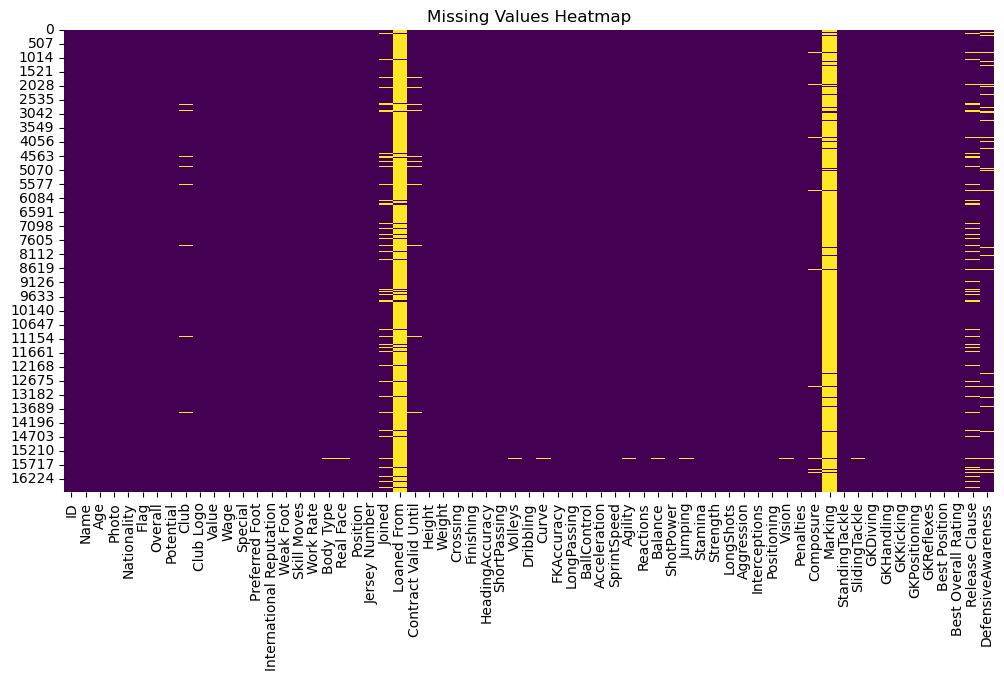

In [17]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [18]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(16710, 62)

In [19]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [20]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean", "Best Position"]].head(10))


                      Position Position_clean Best Position
0  <span class="pos pos18">CAM            CAM           CAM
1  <span class="pos pos11">LDM            LDM            CM
2   <span class="pos pos24">RS             RS            ST
3  <span class="pos pos13">RCM            RCM            CM
4    <span class="pos pos7">LB             LB            LB
5   <span class="pos pos9">RDM            RDM           CDM
6  <span class="pos pos15">LCM            LCM            CM
7  <span class="pos pos28">SUB            SUB            CM
8  <span class="pos pos28">SUB            SUB           CDM
9   <span class="pos pos26">LS             LS           CAM


In [21]:
#Number of players where Position != Best Position: 115
diff_df = fifa[fifa['Position_clean'] != fifa['Best Position']]
print(f"Number of players where Position != Best Position: {len(diff_df)}")
print(diff_df[['Name', 'Position_clean', 'Best Position']].head(10))

Number of players where Position != Best Position: 14274
               Name Position_clean Best Position
1       L. Goretzka            LDM            CM
2         L. Suárez             RS            ST
3      K. De Bruyne            RCM            CM
5        J. Kimmich            RDM           CDM
6          Paulinho            LCM            CM
7      G. Wijnaldum            SUB            CM
8            E. Can            SUB           CDM
9      A. Griezmann             LS           CAM
10        L. Modrić            RCM            CM
11  Marcos Llorente             RM           CAM


In [22]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Position_clean
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,2341,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,CAM
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000.0,140000.0,2314,...,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,LDM
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000.0,2307,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,RS
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,2304,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,RCM
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,45000.0,2292,...,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,LB


In [23]:
#What is the special column?
fifa['Special'].describe()

count    16710.000000
mean      1652.497307
std        257.271696
min        571.000000
25%       1525.000000
50%       1687.000000
75%       1826.000000
max       2341.000000
Name: Special, dtype: float64

count    16710.000000
mean      1652.497307
std        257.271696
min        571.000000
25%       1525.000000
50%       1687.000000
75%       1826.000000
max       2341.000000
Name: Special, dtype: float64


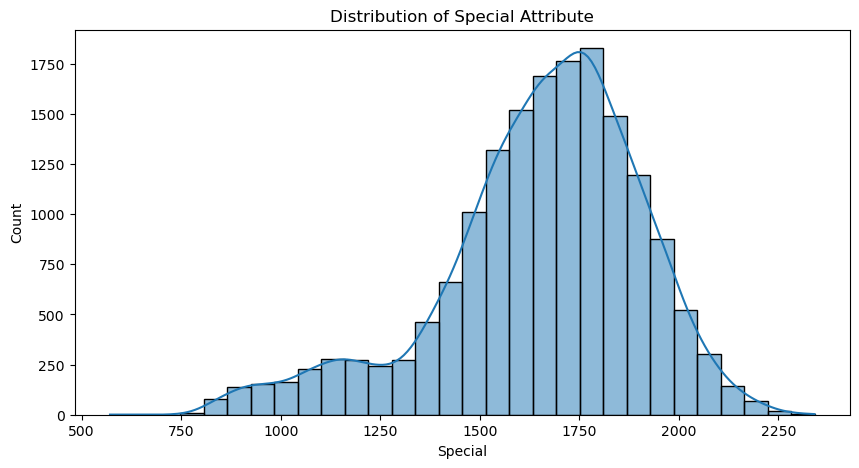

              Name  Special  Overall  Potential                 Club
0  Bruno Fernandes     2341       88         89    Manchester United
1      L. Goretzka     2314       87         88    FC Bayern München
2        L. Suárez     2307       88         88   Atlético de Madrid
3     K. De Bruyne     2304       91         91      Manchester City
4         M. Acuña     2292       84         84           Sevilla FC
5       J. Kimmich     2283       89         90    FC Bayern München
6         Paulinho     2273       83         83              Al Ahli
7     G. Wijnaldum     2271       84         84  Paris Saint-Germain
8           E. Can     2270       82         83    Borussia Dortmund
9     A. Griezmann     2259       85         85   Atlético de Madrid


In [24]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [25]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [26]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['Unique' 'Stocky (170-185)' 'Lean (170-185)' 'Normal (170-185)'
 'Stocky (185+)' 'Normal (185+)' 'Normal (170-)' 'Stocky (170-)'
 'Lean (185+)' 'Lean (170-)' nan]
Empty DataFrame
Columns: [Name, Body Type, Overall, Special, Club]
Index: []


In [27]:
# Clean Body Type Feature in the dataset
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois'
    ]
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    # If body_type matches a known type, return as is
    if body_type in known_types:
        return body_type
    # If main_type is in known types, return it
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    # Otherwise, return main_type or original
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type'].apply(clean_body_type)
print(fifa[['Body Type Clean', 'Body Type']].value_counts())

Body Type Clean  Body Type       
Normal           Normal (170-185)    5713
                 Normal (185+)       3673
Lean             Lean (170-185)      3482
                 Lean (185+)         1684
Stocky           Stocky (170-185)     573
Normal           Normal (170-)        552
Lean             Lean (170-)          387
Stocky           Stocky (185+)        371
Unique           Unique               139
Stocky           Stocky (170-)        107
Name: count, dtype: int64


In [28]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height Weight
0  179cm   69kg
1  189cm   82kg
2  182cm   83kg
3  181cm   70kg
4  172cm   69kg
5  177cm   75kg
6  183cm   80kg
7  175cm   74kg
8  186cm   86kg
9  176cm   73kg


In [29]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Height, dtype: float64


In [30]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

2.72


13230    3.175144
13231    2.721552
13232    3.175144
13233    4.082328
13234    3.628736
13235    3.628736
13236    3.175144
13237    3.628736
13238    3.175144
Name: Weight, dtype: float64

In [31]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height    Weight
0     NaN  2.721552
1     NaN  3.628736
2     NaN  3.628736
3     NaN  3.175144
4     NaN  2.721552
5     NaN  3.175144
6     NaN  3.628736
7     NaN  3.175144
8     NaN  3.628736
9     NaN  3.175144


In [32]:
fifa['Joined'] = pandas_df['Joined']

In [33]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2020-01-30
1   2018-07-01
2   2020-09-25
3   2015-08-30
4   2020-09-14
5   2015-07-01
6   2021-07-22
7   2021-07-01
8   2020-02-18
9          NaT
Name: Joined, dtype: datetime64[ns]


In [34]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ High,High,High
1,High/ Medium,High,Medium
2,High/ Medium,High,Medium
3,High/ High,High,High
4,High/ High,High,High
5,High/ Medium,High,Medium
6,High/ High,High,High
7,High/ High,High,High
8,Medium/ High,Medium,High
9,Medium/ Medium,Medium,Medium


In [35]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

                                         Loaned From Loaned From_clean
0                                                NaN              None
1                                                NaN              None
2                                                NaN              None
3                                                NaN              None
4                                                NaN              None
5                                                NaN              None
6                                                NaN              None
7                                                NaN              None
8                                                NaN              None
9  <a href="/team/241/fc-barcelona/">FC Barcelona...      FC Barcelona


In [36]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
Atalanta              17
Sporting CP           14
Juventus              14
Watford               13
Manchester City       13
Atlético de Madrid    13
SL Benfica            13
Aston Villa           12
Arsenal               12
Manchester United     12
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [37]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Position_clean', 'Body Type Clean',
       'Attacking Work Rate', 'Defensive Work Rate', 'Loaned From_clean'],
  

In [38]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,2341,...,14.0,CAM,88.0,€206.9M,72.0,CAM,Unique,High,High,None
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000.0,140000.0,2314,...,9.0,CM,87.0,€160.4M,74.0,LDM,Unique,High,Medium,None
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000.0,2307,...,37.0,ST,88.0,€91.2M,42.0,RS,Unique,High,Medium,None
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,2304,...,13.0,CM,91.0,€232.2M,68.0,RCM,Unique,High,High,None
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,45000.0,2292,...,14.0,LB,84.0,€77.7M,80.0,LB,Stocky,High,High,None
5,212622,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,2283,...,15.0,CDM,89.0,€186.3M,85.0,RDM,Lean,High,Medium,None
6,187961,Paulinho,32,Brazil,83,83,Al Ahli,28500000.0,61000.0,2273,...,8.0,CM,83.0,€48.5M,80.0,LCM,Normal,High,High,None
7,181291,G. Wijnaldum,30,Netherlands,84,84,Paris Saint-Germain,40500000.0,115000.0,2271,...,6.0,CM,84.0,€74.9M,79.0,SUB,Unique,High,High,None
8,208333,E. Can,27,Germany,82,83,Borussia Dortmund,35000000.0,72000.0,2270,...,11.0,CDM,85.0,€62.1M,81.0,SUB,Stocky,Medium,High,None
9,194765,A. Griezmann,30,France,85,85,Atlético de Madrid,53000000.0,220000.0,2259,...,14.0,CAM,86.0,NaN,43.0,LS,Unique,Medium,Medium,FC Barcelona


In [39]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 16710  │ │ float64     │ 44    │                                                          │
│ │ Number of columns │ 63     │ │ string      │ 13    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                  ┃ NA                                ┃ NA %                         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Height                                  │                             16710 │                          100 │  │
│ └─────────────────────────────────────────┴───────────────────────────────────┴──────────────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA    ┃ NA %      ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID        │     0 │         0 │  220600 │   38500 │    27 │ 203900 │  229300 │  245400 │   264700 │    ▁▅▇ │  │
│ │ Age       │     0 │         0 │   25.73 │   5.049 │    16 │     22 │      25 │      29 │       54 │  ▆▇▅▁  │  │
│ │ Overall   │     0 │         0 │   67.65 │   6.458 │    28 │     63 │      68 │      72 │       93 │   ▂▇▃  │  │
│ │ Potential │     0 │         0 │   72.57 │   5.688 │    38 │     69 │      72 │      76 │       95 │   ▂▇▃  │  │
│ │ Value     │     0 │         0 │ 3347000 │ 8123000 │     0 │ 600000 │ 1200000 │ 2500000 │ 19400000 │   ▇    │  │
│ │           │       │           │         │         │       │        │         │         │        0 │        │  │
│ │ Wage      │     0 │         0 │   11340 │   21310 │     0 │   2000 │    4000 │   12000 │   350000 │   ▇    │  │
│ │ Special   │     0 │         0 │    1652 │   257.3 │   571 │   1525 │    1687 │    1826 │     2341 │  ▁▂▇▆▁ │  │
│ │ Internati │     0 │         0 │    1.17 │  0.4853 │     1 │      1 │       1 │       1 │        5 │   ▇▁   │  │
│ │ onal      │       │           │         │         │       │        │         │         │          │        │  │
│ │ Reputatio │       │           │         │         │       │        │         │         │          │        │  │
│ │ n         │       │           │         │         │       │        │         │         │          │        │  │
│ │ Weak Foot │     0 │         0 │   3.008 │  0.6817 │     1 │      3 │       3 │       3 │        5 │  ▃ ▇▂  │  │
│ │ Skill     │     0 │         0 │   2.475 │  0.7914 │     1 │      2 │       2 │       3 │        5 │ ▂▇ ▇▂  │  │
│ │ Moves     │       │           │         │         │ 

## Graphs(temp)

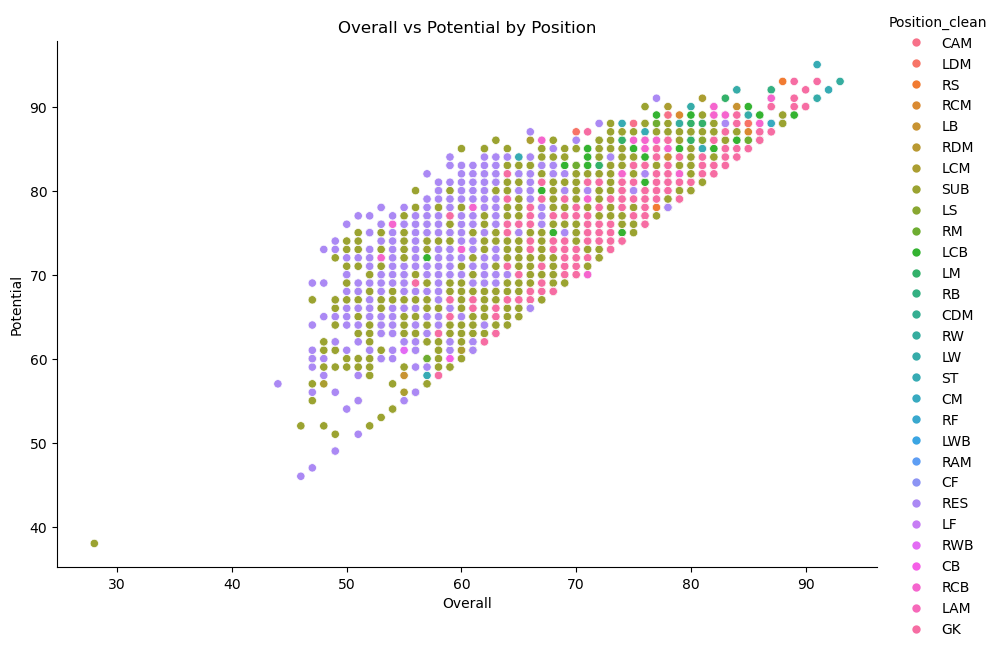

In [40]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [41]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                      Name  Overall  Potential                 Club   Wage
82               K. Mbappé       91         95  Paris Saint-Germain  €230K
29                L. Messi       93         93  Paris Saint-Germain  €320K
251             E. Haaland       88         93    Borussia Dortmund  €110K
14244             J. Oblak       91         93   Atlético de Madrid  €130K
14608        G. Donnarumma       89         93  Paris Saint-Germain  €110K
17              F. de Jong       87         92         FC Barcelona  €210K
24     T. Alexander-Arnold       87         92            Liverpool  €150K
33          R. Lewandowski       92         92    FC Bayern München  €270K
444               P. Foden       84         92      Manchester City  €125K
588             K. Havertz       84         92              Chelsea  €130K


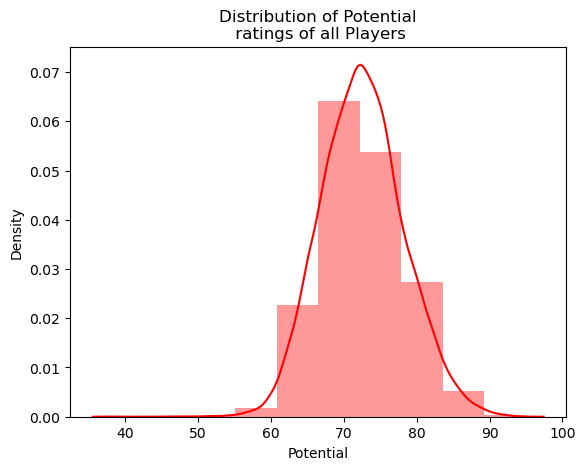

In [42]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [43]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                    Name  Overall  Potential                 Club   Wage
29              L. Messi       93         93  Paris Saint-Germain  €320K
33        R. Lewandowski       92         92    FC Bayern München  €270K
3           K. De Bruyne       91         91      Manchester City  €350K
36     Cristiano Ronaldo       91         91    Manchester United  €270K
64             Neymar Jr       91         91  Paris Saint-Germain  €270K
82             K. Mbappé       91         95  Paris Saint-Germain  €230K
14244           J. Oblak       91         93   Atlético de Madrid  €130K
39               H. Kane       90         90    Tottenham Hotspur  €240K
71              N. Kanté       90         90              Chelsea  €230K
12350           M. Neuer       90         90    FC Bayern München   €86K


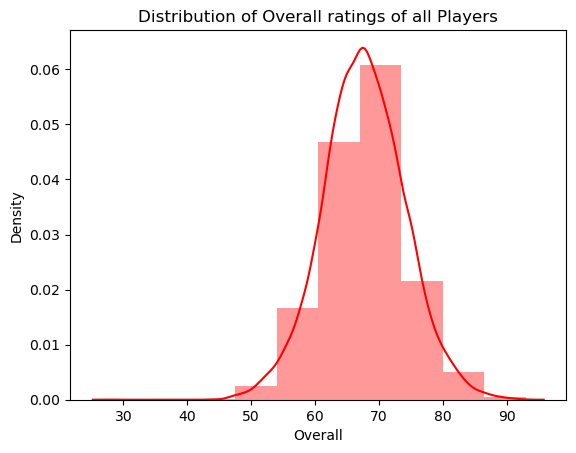

In [44]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [45]:
# Save the final dataframe to a CSV file
fifa.to_csv('fifa_dataset_cleaned/fifa_final22.csv', index=False)